<a href="https://colab.research.google.com/github/mounikaduddukuri/S12/blob/master/S12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
import os 
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 12'
sys.path.append(workingdir)

In [0]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#Read COCO JSON File
fptr = open('/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 12/data/dog_dataset_coco.json')
data = json.load(fptr)
print(data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


In [0]:
#Extract Details
images_df = pd.DataFrame(data['images'], columns = data['images'][0].keys())
annotations_df = pd.DataFrame(data['annotations'], columns = data['annotations'][0].keys())

In [0]:
images_df.head()

,id,width,height,file_name,license,date_captured
0,0,473,471,dog_1.jpg,1,
1,1,474,474,dog_2.jpg,1,
2,2,473,315,dog_3.jpg,1,
3,3,474,355,dog_4.jpg,1,
4,4,474,323,dog_5.jpg,1,


In [0]:
annotations_df.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd
0,0,0,2,"[59, 105, 380, 105, 380, 454, 59, 454]",112029,"[59, 105, 321, 349]",0
1,1,1,4,"[151, 63, 343, 63, 343, 297, 151, 297]",44928,"[151, 63, 192, 234]",0
2,2,2,3,"[49, 54, 345, 54, 345, 311, 49, 311]",76072,"[49, 54, 296, 257]",0
3,3,3,2,"[21, 18, 427, 18, 427, 343, 21, 343]",131950,"[21, 18, 406, 325]",0
4,4,4,4,"[43, 37, 256, 37, 256, 321, 43, 321]",60492,"[43, 37, 213, 284]",0


In [0]:
#Extract the Box Dimensions
dogs_df = pd.concat([images_df, annotations_df], 1)[['file_name', 'width', 'height', 'bbox']]
x_list = []
y_list = []
w_list = []
h_list = [] 
for row in range(dogs_df.shape[0]):
  x = dogs_df['bbox'][row][0]
  y = dogs_df['bbox'][row][1]
  w = dogs_df['bbox'][row][2]
  h = dogs_df['bbox'][row][3]
  x_list.append(x)
  y_list.append(y)
  w_list.append(w)
  h_list.append(h)
box_df = pd.DataFrame(list(zip(x_list, y_list, w_list, h_list)), columns =['x', 'y', 'box_width', 'box_height'])
dogs_df = pd.concat([dogs_df, box_df], 1)
dogs_df = dogs_df.drop('bbox', axis =1)

In [0]:
dogs_df.head()

,file_name,width,height,x,y,box_width,box_height
0,dog_1.jpg,473,471,59,105,321,349
1,dog_2.jpg,474,474,151,63,192,234
2,dog_3.jpg,473,315,49,54,296,257
3,dog_4.jpg,474,355,21,18,406,325
4,dog_5.jpg,474,323,43,37,213,284


In [0]:
#Normalize the Box Dimensions based on Image Height and Width
dogs_df['x'] = dogs_df['x'] / dogs_df['width']
dogs_df['y'] = dogs_df['y'] / dogs_df['height']
dogs_df['box_width'] = dogs_df['box_width'] / dogs_df['width']
dogs_df['box_height'] = dogs_df['box_height'] / dogs_df['height']

In [0]:
dogs_df.head()

,file_name,width,height,x,y,box_width,box_height
0,dog_1.jpg,473,471,0.124736,0.222930,0.678647,0.740977
1,dog_2.jpg,474,474,0.318565,0.132911,0.405063,0.493671
2,dog_3.jpg,473,315,0.103594,0.171429,0.625793,0.815873
3,dog_4.jpg,474,355,0.044304,0.050704,0.856540,0.915493
4,dog_5.jpg,474,323,0.090717,0.114551,0.449367,0.879257


In [0]:
hw_array = dogs_df[["box_width", "box_height"]].to_numpy()

In [0]:
hw_array.shape

(50, 2)

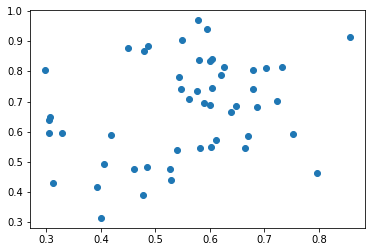

In [0]:
plt.scatter(hw_array[:,0], hw_array[:,1])

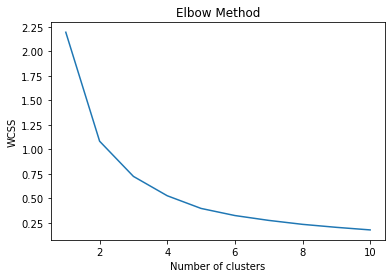

In [0]:
#Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(hw_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

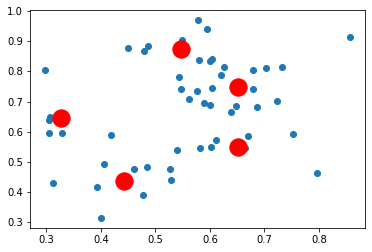

In [0]:
#Determine the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(hw_array)
plt.scatter(hw_array[:,0], hw_array[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()